# German Credit Risk


Fonte: https://www.kaggle.com/datasets/ppb00x/credit-risk-customers

# Initial imports

In [1]:
%pip install ipython-autotime  --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.0 MB/s eta 0:00:00


In [2]:
from google.colab import drive, files
import pandas as pd
drive.mount('/content/drive', force_remount=True)
%load_ext autotime

Mounted at /content/drive
time: 506 µs (started: 2023-06-22 23:43:32 +00:00)


In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/datasets/credit-risk-customers/credit_customers.csv", encoding='utf-8')

time: 602 ms (started: 2023-06-22 23:43:32 +00:00)


# EDA

In [4]:
dataset

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


time: 41.6 ms (started: 2023-06-22 23:43:33 +00:00)


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

Obtendo os nomes dos atributos numéricos e categóricos para facilitar as análises.

In [6]:
categorical = list()
numerical   = list()

for name in dataset.columns:
  if dataset[name].dtype == 'object':
    categorical.append(name)
  else:
    numerical.append(name)

print(f'Categorical features: {categorical}')
print(f'Numerical features: {numerical}')

Categorical features: ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker', 'class']
Numerical features: ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']
time: 11 ms (started: 2023-06-22 23:44:10 +00:00)


Agora, vejamos quantas classes há em cada atributo categórico.

In [7]:
for name in categorical:
  print(f'{name}: {list(dataset[name].unique())}')

checking_status: ['<0', '0<=X<200', 'no checking', '>=200']
credit_history: ['critical/other existing credit', 'existing paid', 'delayed previously', 'no credits/all paid', 'all paid']
purpose: ['radio/tv', 'education', 'furniture/equipment', 'new car', 'used car', 'business', 'domestic appliance', 'repairs', 'other', 'retraining']
savings_status: ['no known savings', '<100', '500<=X<1000', '>=1000', '100<=X<500']
employment: ['>=7', '1<=X<4', '4<=X<7', 'unemployed', '<1']
personal_status: ['male single', 'female div/dep/mar', 'male div/sep', 'male mar/wid']
other_parties: ['none', 'guarantor', 'co applicant']
property_magnitude: ['real estate', 'life insurance', 'no known property', 'car']
other_payment_plans: ['none', 'bank', 'stores']
housing: ['own', 'for free', 'rent']
job: ['skilled', 'unskilled resident', 'high qualif/self emp/mgmt', 'unemp/unskilled non res']
own_telephone: ['yes', 'none']
foreign_worker: ['yes', 'no']
class: ['good', 'bad']
time: 10.9 ms (started: 2023-06-22 2

Obtendo dados adicionais dos atributos numéricos.

In [8]:
dataset[numerical].describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


time: 123 ms (started: 2023-06-22 23:44:27 +00:00)


Vou verificar se há valores ausentes no conjunto de dados.

In [ ]:
print(f'NaN values: {dataset.isna().sum().sum()}')

NaN values: 0
time: 7.76 ms (started: 2023-06-21 23:58:34 +00:00)


## Data visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

time: 1.57 s (started: 2023-06-22 23:48:13 +00:00)


Vou visualizar a distribuição das classes da label.

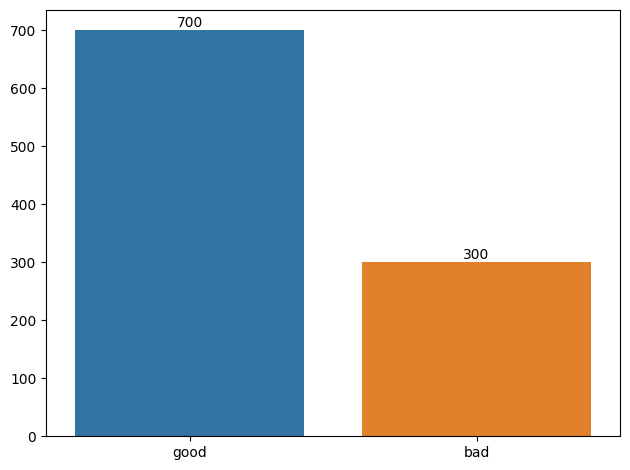

time: 1.22 s (started: 2023-06-22 23:52:10 +00:00)


In [12]:
classes = dataset['class'].value_counts()
x = sns.barplot(x=classes.index, y=classes.values)
x.bar_label(x.containers[0])
plt.tight_layout()
plt.show()

O gráfico acima mostra um grande desequilíbrio de classes. Considerando o problema, considero um desequilíbrio natural uma  vez que há muito mais pessoas com equilíbrio financeiro e consideradas boas pagadoras do que o contrário.

# Train/Test split

# Feature engineering

# Model training